# Building A Neural Network To Do Sentiment Analysis



Below are the steps involved in the ML model building for the tweets sentiment analysis:

Import Necessary Dependencies

Read and Load the Dataset

Exploratory Data Analysis

Data Visualization of Target Variables

Data Preprocessing

Splitting our data into Train and Test sets.

Transforming Dataset using TF-IDF Vectorizer

Function for Model Evaluation

Model Building

Model Evaluation

Install the necessary libraries.

I intend to install plotly_express, but the module was not found on Google Colab, hence I upgraded the plotly version.

In [1]:
import plotly
plotly.__version__

'5.13.1'

In [2]:
pip install plotly==5.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=069ab60159d8ebffd0b9c5d31c0b8f85af9a3d3b465641c421c6251ddef16b42
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [5]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.6 MB/s eta 0:00:00


In [6]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=0f303dc5c434b05e7f13de52046bda4275d60507022d1af8c76b96123ae8577f
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
import pickle
import string
import contractions
from autocorrect import Speller
from wordcloud import WordCloud, STOPWORDS
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()


In [8]:
sns.set_style('darkgrid') #<-- Customizing dsiplay option for Seaborn plots
pd.set_option('display.max_colwidth', 200) #<-- Customizing prefered dsiplay option for Pandas dataframe

#Data Ingestion

The data was given to us as part of the assignment, and it is called bike-dataset hour.csv. The first step is to import the file to Google Colab.


I am using the Financial Tweets dataset gotten from here:
https://www.kaggle.com/datasets/davidwallach/financial-tweets?resource=download

In [9]:
from google.colab import files
uploaded = files.upload()

Saving stockerbot-export.csv to stockerbot-export.csv


I got the error when i ran the code below: ParserError: Error tokenizing data. C error: Expected 8 fields in line 731, saw 13

To solve it, I added: error_bad_lines=False based on Pandas API reference (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

This ensures that the offending lines to be skipped. 

In [10]:
#check the top part of the dataset
tweets = pd.read_csv("./stockerbot-export.csv", error_bad_lines=False)
tweets.head(10)

<ipython-input-10-6ace5819008b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv("./stockerbot-export.csv", error_bad_lines=False)
Skipping line 731: expected 8 fields, saw 13
Skipping line 2836: expected 8 fields, saw 15
Skipping line 3058: expected 8 fields, saw 12
Skipping line 3113: expected 8 fields, saw 12
Skipping line 3194: expected 8 fields, saw 17
Skipping line 3205: expected 8 fields, saw 17
Skipping line 3255: expected 8 fields, saw 17
Skipping line 3520: expected 8 fields, saw 17
Skipping line 4078: expected 8 fields, saw 17
Skipping line 4087: expected 8 fields, saw 17
Skipping line 4088: expected 8 fields, saw 17
Skipping line 4499: expected 8 fields, saw 12



,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777503745,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038547968,True
2,1019711413798035500,Who says the American Dream is dead? https://t.co/CRgx19x7sA,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587740160,True
4,1019718460287389700,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
5,1019719465095790600,.@RealMoney's David Butler's favorite FANG stock isn't #RealMoneySOD Alphabet but Facebook https://t.co/MczAPSFjOi,Wed Jul 18 23:04:00 +0000 2018,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,http://bit.ly/2NrYxje,True
6,1019720209786114000,Don’t miss my convo with one of my favorite thinkers @SamHarrisOrg! https://t.co/uuPVxIobCh,Wed Jul 18 23:06:58 +0000 2018,ianbremmer,HRS,Harris,https://twitter.com/samharrisorg/status/1019719376348434433,True
7,1019720659738480600,U.S. intelligence documents on Nelson Mandela made public https://t.co/XTnEfo1rO6 https://t.co/V8DXkWDQ6R,Wed Jul 18 23:08:45 +0000 2018,Reuters,INTC-USB,Intel*U.S.,https://reut.rs/2O0ypNf,True
8,1019720723441635300,Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg,Wed Jul 18 23:09:00 +0000 2018,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
9,1019721145396887600,Hedge fund manager Marc Larsy says bitcoin $40K is possible https://t.co/54uPe0OWqT,Wed Jul 18 23:10:41 +0000 2018,MarketWatch,BTC,Bitcoin,https://on.mktw.net/2Ntr7k9,True


In [11]:
tweets.info() #<-- this summarizes the dataframe.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28264 entries, 0 to 28263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             28264 non-null  int64 
 1   text           28264 non-null  object
 2   timestamp      28264 non-null  object
 3   source         28264 non-null  object
 4   symbols        28264 non-null  object
 5   company_names  28263 non-null  object
 6   url            21895 non-null  object
 7   verified       28264 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.5+ MB


Cleaning the Dataset

In [12]:
tweets.describe(include='O').T

,count,unique,top,freq
text,28264,25685,RT @MorganLBrennan: With #Helsinki2018 underway: worth noting that in the past year the U.S. has approved foreign military sales of Javelin…,69
timestamp,28264,26777,Wed Jul 18 22:19:00 +0000 2018,7
source,28264,5879,bibeypost_stock,990
symbols,28264,453,NFLX,101
company_names,28263,461,Twenty-First Century Fox,131
url,21895,17814,http://binance.com/?ref=10078236,850



To start, I want to drop duplicates

In [13]:
def duplicates_number(tweets):
  before = tweets.shape[0]
  print(f'No. of Rows -- Prior To Dropping The Duplicates: {before}')
  tweets.drop_duplicates(keep='first', inplace=True)
  after = tweets.shape[0]
  print(f'No. of Rows -- Once Duplicates Are Dropped: {after}')
  print('')
  if before == after:
     return print("No duplicate row exists in the dataset")
  else:
     return print(f'{before - after} duplicate row(s) no longer exist in the dataset')


In [14]:
duplicates_number(tweets)


No. of Rows -- Prior To Dropping The Duplicates: 28264
No. of Rows -- Once Duplicates Are Dropped: 28264

No duplicate row exists in the dataset


From the above, there was no duplicates in the dataset.

Another code to drop duplicates.

In [15]:
tweets.drop_duplicates(inplace = True)

Check for null values

In [16]:
np.sum(tweets.isnull().any(axis=1))

6369

I want to check where the null values are.

In [17]:
print(tweets.isnull().sum())

id                  0
text                0
timestamp           0
source              0
symbols             0
company_names       1
url              6369
verified            0
dtype: int64


Since the null values are in the URL section, I have decided to drop the column with the numerous null values, URL.

In [18]:
new_tweets = tweets.dropna(axis=1)

In [19]:
new_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28264 entries, 0 to 28263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         28264 non-null  int64 
 1   text       28264 non-null  object
 2   timestamp  28264 non-null  object
 3   source     28264 non-null  object
 4   symbols    28264 non-null  object
 5   verified   28264 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.3+ MB


The URL column is no longer there in the new_tweets dataset.

Sentiment Analysis



In [20]:
from textblob import TextBlob 

In [21]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

First Method:

Using NLTK's SentimentIntensityAnalyzer

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [24]:
sentiments_using_SIA = new_tweets.text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,text
pos,25463
neg,2801


Second method:

Using TextBlob

In [25]:
# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [26]:
sentiments_using_textblob = new_tweets.text.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,text
pos,24542
neg,3722


TextBlob gives us more negative sentiments than its counterpart.

In [27]:
new_tweets['sentiment'] = sentiments_using_textblob
new_tweets.head()

<ipython-input-27-0f3edd953a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tweets['sentiment'] = sentiments_using_textblob


,id,text,timestamp,source,symbols,verified,sentiment
0,1019696670777503700,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,True,pos
1,1019709091038548000,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,True,neg
2,1019711413798035500,Who says the American Dream is dead? https://t.co/CRgx19x7sA,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,True,neg
3,1019716662587740200,Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,True,pos
4,1019718460287389700,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,True,pos



Drop unnecessary columns

In [28]:
new_tweets = new_tweets.drop(columns=['id', 'timestamp', 'source'])
new_tweets.head(1)

,text,symbols,verified,sentiment
0,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,GS,True,pos


#Exploratory Data Analysis

**Finding Common Words**

I want to explore and visualize the pre-cleaned data. To begin, I want to see the common words. I will use Word Cloud module to do this. Start by importing it and specifying the size and color of the chart.

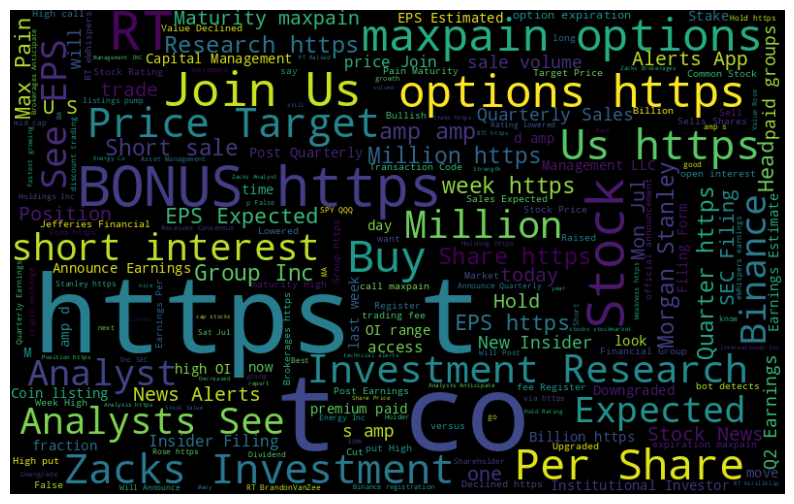

In [29]:
all_words = ' '.join([text for text in new_tweets['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Non-Hateful Words**

I want to see a display of the non-hateful words.

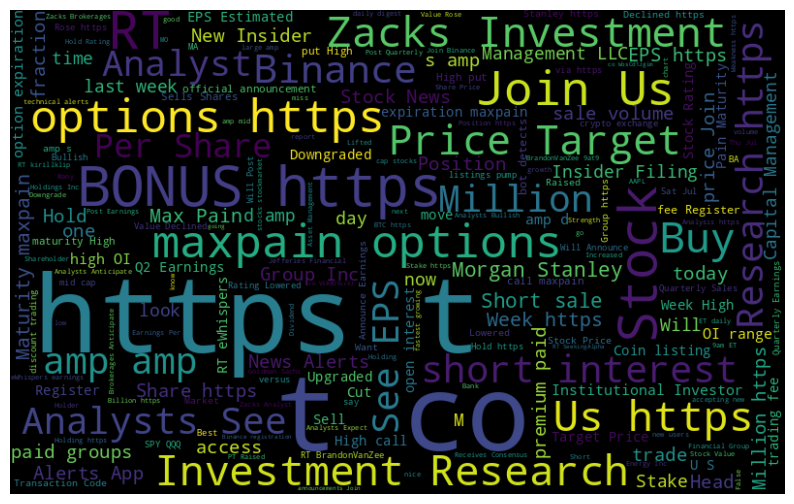

In [30]:
normal_words =' '.join([text for text in new_tweets['text'][new_tweets['sentiment'] == 'pos']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Hateful Tweets

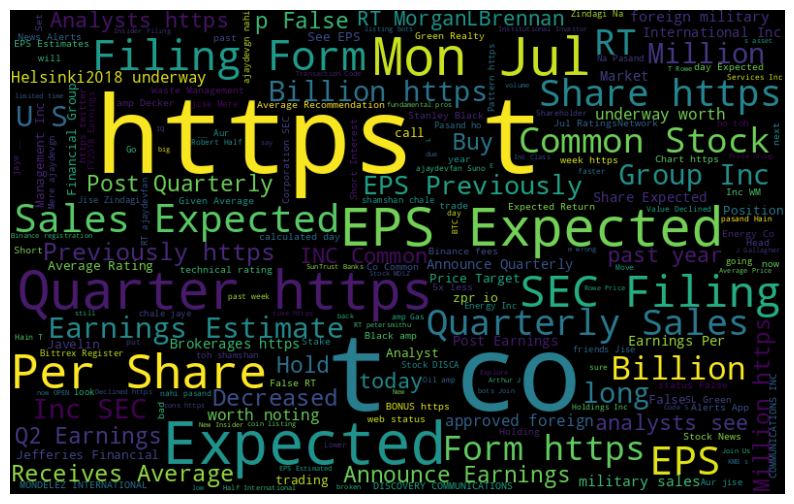

In [31]:
negative_words = ' '.join([text for text in new_tweets['text'][new_tweets['sentiment'] == 'neg']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Exploring The Hashtags In Tweets With Bar Chart

The first stage is to define the function that I will use in collecting the hashtags, then looping over the words in the tweet.

Hashtags in tweets usually come after a #.

In [32]:
# defining the function that I want to utilize in collecting the hashtags
def extract_hashtag(x):
    hashtags = []
    # This is for looping over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

This is to extract the hashtags from the positive and negative tweets. Before this can work, I have to impot the module, re.


In [33]:
import re
# getting the hashtags from positive tweets

good_ht = extract_hashtag(new_tweets['text'][new_tweets['sentiment'] == 'pos'])

# getting the hashtags from negative tweets
bad_ht = extract_hashtag(new_tweets['text'][new_tweets['sentiment'] == 'neg'])

# this is to unnest the list
good_ht = sum(good_ht,[])
bad_ht = sum(bad_ht,[])

**Plotting the hashtags from positive tweets**

I want to plot the ten most frequent hashtags in positive tweets. To do this, I will matplotlib.pyplot and name the x label as hashtag and y label as count.

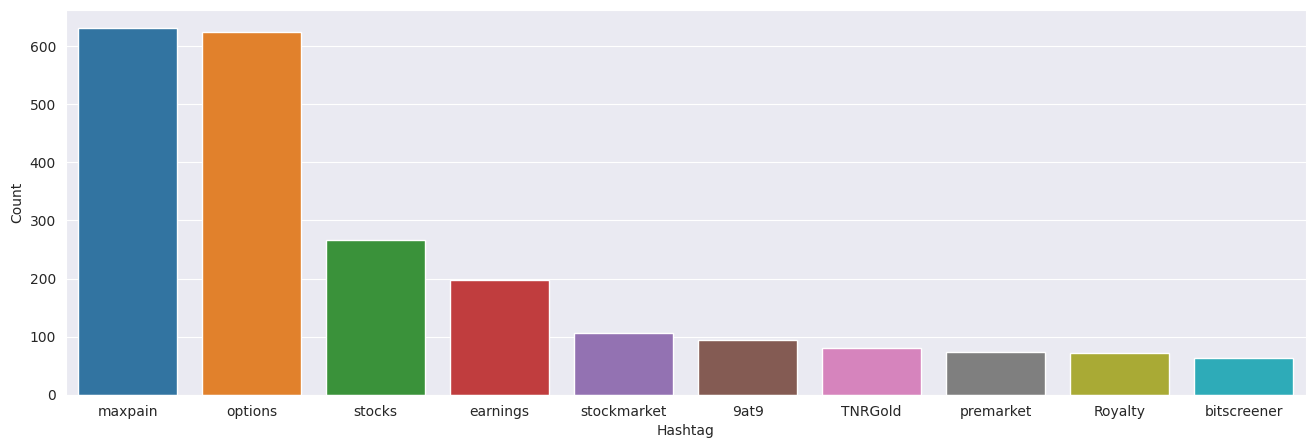

In [34]:
a = nltk.FreqDist(good_ht)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Illustration of the positive and negative tweets with pie chart**

I want to check how many tweets were positive and negative, then represent the figures in a pie chart.

In [35]:
counts_of_sentiment = new_tweets.groupby(['sentiment']).size()
print(counts_of_sentiment)

sentiment
neg     3722
pos    24542
dtype: int64


From the above, we can see that negative tweets were 3722, while positive tweets were 24542. This means that more positive tweets were targeted at these companies than negative tweets.

<Axes: >

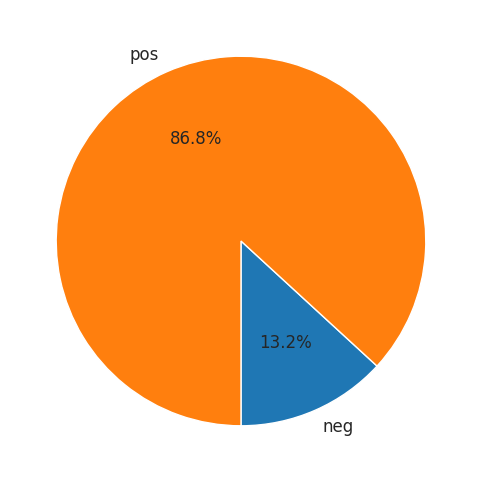

In [36]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
counts_of_sentiment.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

From the above, we can see that negative tweets occupy a 13.2%, while positive tweets are 86.8%. This confirms the above count.

How many companies are in the dataset

In [37]:
company_idx = new_tweets['symbols'].value_counts().index
company_val = new_tweets['symbols'].value_counts().values
fig = px.bar(data_frame = new_tweets, x = company_idx, y = company_val, title = 'Top Companies In The Dataset')
fig.update_layout(xaxis_title = 'Companies', yaxis_title = 'Count')


Is there a class imbalance issue?

In [38]:
fig = px.histogram(new_tweets, x = 'sentiment', color = 'sentiment', text_auto=True)
fig.update_layout(title = 'The Distribution of Sentiment On Companies')
fig.show()



In [39]:
new_tweets['sentiment'].value_counts(normalize=True)

pos    0.868313
neg    0.131687
Name: sentiment, dtype: float64

There's a class imbalance problem in our dataset. In order to allow our model learn the patterns in the data properly without being bias to
the minority class, we must try to reconcile the huge diiference in class balance. This will be acheived by using any of the following aproach:

Data-Centric Approaches
1. Text Augmentation using (Adversarial TextAttack, Sentence Translation, or Word Embedding)
2. Resampling Technique

Model-Centric Approaches:
1. Hyperparameter Tunning
2. Using Ensemble Approach like Bagging, Boosting, or Stacking
3. Transfer Learning With Deep Neural Nets

Because at this time, I'm more aligned with Data-Centric AI than Model-Centric AI, so I'll use Text Augmentation to solve the class
imbalance problem.


# Text Pre-processing

Text Augmentation

One can seee a class imbalance in the dataset, as positive was 87%, and negative was 13%. There are significantly more "Positive" sentiment than "Negative" sentiment. 

Text augmentation is performed to increase the number of
minority class examples. Ideally, this will lessen the model's bias towards majority class predictions ("Positive") during training. Words are
randomly swapped, deleted, and substituted with synonyms using a pre-trained word embedding model.

In [40]:
pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 89.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.

In [41]:
from textattack.augmentation import EasyDataAugmenter, WordNetAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
wordnet_aug = WordNetAugmenter(pct_words_to_swap = 0.2, transformations_per_example=3);

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [43]:
tweets_positive = new_tweets[new_tweets['sentiment'] == 'pos'] #<-- Subseting the positive sentiments 

In [44]:
tweets_negative = new_tweets[new_tweets['sentiment'] == 'neg'] #<-- Subset a dataframe of interest; only negative sentiment

In [45]:
aug_corpus = []
def augment_corpus(text):
  """
  Augment text and append to an array.
  """
  try:
    aug_corpus.extend(wordnet_aug.augment(text))
  except:

   pass


In [46]:
tweets_negative['text'].progress_apply(augment_corpus);

  0%|          | 0/3722 [00:00<?, ?it/s]

In [55]:
tweets_augmented = pd.DataFrame(zip(['neg']*len(aug_corpus), aug_corpus), columns = ['sentiment', 'text'])

Concatenating Augmented, Original 'Positive', & Original 'Negative' DataFrames

In [56]:
print(f'Shape of Augmented DataFrame: {tweets_augmented.shape}\nShape of Positive DataFrame: {tweets_positive.shape}')
print(f'Shape of Negative DataFrame: {tweets_negative.shape}\n')
print(f'The 3 DataFrames When Joined: {len(tweets_augmented) + len(tweets_negative) + len(tweets_positive)} rows')

Shape of Augmented DataFrame: (11155, 2)
Shape of Positive DataFrame: (24542, 4)
Shape of Negative DataFrame: (3722, 4)

The 3 DataFrames When Joined: 39419 rows


In [57]:
new_tweets_balanced= pd.concat([tweets_positive, tweets_augmented, tweets_negative]).sample(frac=1) #<-- concat augmented, positive, and negative
new_tweets_balanced.reset_index(drop=True, inplace=True)

In [58]:
print(f'Shape of Joined DataFrame: {new_tweets_balanced.shape}')

Shape of Joined DataFrame: (39419, 4)


In [59]:
new_tweets_balanced.head()

,text,symbols,verified,sentiment
0,$OUT $SEAS $HE $YELP $SAM $FOR $A $CAB $HE $HUM $ALL $HUBS $AGO,HUM,False,pos
1,$gnca @GenoceaBio @TheChipClark This has surpass the guide of being nauseate how can management break on with busine… https://t.co/blRi5yn5Ct,NaN,NaN,neg
2,Bendigo &amp; Adelaide $BEN -0.9% after lifting interest rates out of cycle for owner occupied &amp; investor loans due to… https://t.co/qRf5ZGyNHI,BEN,True,neg
3,RT @IBMFacts: $IBM revenue grew 4% to $20B and strategic imperatives grew 15% to $10B in 2Q. https://t.co/NdBsuQ2CW4 https://t.co/L8l3ZM0kGi,IBM,False,pos
4,Our bot detects coin listings faster than official announcement! 🤑 Join Us ➡️ https://t.co/iR0BFUm0t7 $GRID… https://t.co/MIPznZP7Uv,RIG,False,pos


In [60]:
fig = px.histogram(new_tweets_balanced, x = 'sentiment', color = 'sentiment', text_auto=True)
fig.update_layout(title = 'The Distribution of Sentiment On Airlines After Augmentation')
fig.show()

There are different ways to handle class imbalance problems like increasing the penalty associated with misclassifying the
positive class relative to the negative class, over-sampling the majority class, and undersampling the minority class.

In this case, the text augmentation technique is used.

URL Removal

In [120]:
def remove_url(text_text):
  return re.sub(r'https\S+', '', text_text)

new_tweets_balanced['text'] =  new_tweets_balanced['text'].apply(remove_url)

Punctuation removal

In [121]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [122]:
def remove_marks(text_text):
  return re.sub('[^a-zA-Z]',' ',text_text)

new_tweets_balanced['Clean_text'] =  new_tweets_balanced['text'].apply(remove_marks)

Username removal

In [123]:
def remove_username(text_text):
  return re.sub('@[\w]+', '', text_text)

new_tweets_balanced['Clean_text'] =  new_tweets_balanced['text'].apply(remove_username)

Removal of Emojis

In [124]:
def emoji_removal(text_text):
    emoji = re.compile("["
                               u"\U0001F600-\U0001F64F"  # This to remove emoticons
                               u"\U0001F300-\U0001F5FF"  # This is to remove symbols and pictographs
                               u"\U0001F680-\U0001F6FF"  # This is to remove transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # This is to remove flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji.sub(r'', text_text)

new_tweets_balanced['Clean_text'] =  new_tweets_balanced['Clean_text'].apply(emoji_removal)

Make everything lowercase

In [125]:
def lowercase(text_text):
  return str(text_text).lower()

new_tweets_balanced['Clean_text'] = new_tweets_balanced['Clean_text'].apply(lowercase)

**Tokenization**

I want to split the text in the Clean_text column to tokens or smaller pieces. To do this, I will use the nltk library.


I will first import the nltk library. In the second line, I am downloading punkt before I can import the word_tokenize that I need to carry out the tokenization process.

By tokenization, I am converting the tweets into words that are being separated by spaces called tokens.

The aim of tokenization in cleaning of text data is to make it easier to develop the  model and allow it to easily understand the meaning in a text based on how the words are being arranged.

In [126]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text_text):
  return word_tokenize(text_text)

new_tweets_balanced['Clean_text'] = new_tweets_balanced['Clean_text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing stopwords

In [127]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# The next step is to check the stopwords.

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

After seeing the stopwords in english, the next step is to remove them from the Clean_text column.


In the first line, i am assigning the stopwords that I found in the previous block of code to the stop_words.

I am defining remove_stopwords in the second line and asking the code to return those items in the column called Clean_text that are not stop words.

The last line is asking to remove the stopwords from Clean_text column.

In [128]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(Clean_text):
  return[item for item in Clean_text if item not in stop_words]

new_tweets['Clean_text'] = new_tweets_balanced['Clean_text'].apply(remove_stopwords)

Lemmatizing

I am using lemmatizing because it tends to preserve the base words unlike stemming.

In [129]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('omw-1.4')

# I am creating an instance of WordNetLemmatizer.
lemma=WordNetLemmatizer()

def remove_lemmatizer(Clean_text):

# I am calling the lemmatizer method.
  return[lemma.lemmatize(word=w,pos='v') for w in Clean_text]

new_tweets['lemmatizer_text'] = new_tweets['Clean_text'].apply(remove_lemmatizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [130]:
new_tweets.head()

,text,symbols,verified,sentiment,Clean_text,lemmatizer_text
0,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,GS,True,pos,"[$, $, seas, $, $, yelp, $, sam, $, $, $, cab, $, $, hum, $, $, hubs, $, ago]","[$, $, seas, $, $, yelp, $, sam, $, $, $, cab, $, $, hum, $, $, hubs, $, ago]"
1,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,M,True,neg,"[$, gnca, surpass, guide, nauseate, management, break, busine…]","[$, gnca, surpass, guide, nauseate, management, break, busine…]"
2,Who says the American Dream is dead? https://t.co/CRgx19x7sA,AIG,True,neg,"[bendigo, &, amp, ;, adelaide, $, ben, -0.9, %, lifting, interest, rates, cycle, owner, occupied, &, amp, ;, investor, loans, due, to…]","[bendigo, &, amp, ;, adelaide, $, ben, -0.9, %, lift, interest, rat, cycle, owner, occupy, &, amp, ;, investor, loan, due, to…]"
3,Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY,BTC,True,pos,"[rt, :, $, ibm, revenue, grew, 4, %, $, 20b, strategic, imperatives, grew, 15, %, $, 10b, 2q, .]","[rt, :, $, ibm, revenue, grow, 4, %, $, 20b, strategic, imperatives, grow, 15, %, $, 10b, 2q, .]"
4,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,ORCL,True,pos,"[bot, detects, coin, listings, faster, official, announcement, !, 🤑, join, us, $, grid…]","[bot, detect, coin, list, faster, official, announcement, !, 🤑, join, us, $, grid…]"


In [134]:
import itertools
Lemma_words = list(itertools.chain.from_iterable(new_tweets['lemmatizer_text']))

# I want to find the unique tokens range in lemmatizing

print("Lemma Unique words are: "+str(len(set(Lemma_words))));

Lemma Unique words are: 26573


Removing words with two or less letters because they are unnecessary

In [135]:
def remove_words(Clean_text):
  return[i for i in Clean_text if len(i) > 2]

new_tweets['lemmatizer_text'] = new_tweets['lemmatizer_text'].apply(remove_words)

In [136]:
new_tweets.head()

,text,symbols,verified,sentiment,Clean_text,lemmatizer_text
0,VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV,GS,True,pos,"[$, $, seas, $, $, yelp, $, sam, $, $, $, cab, $, $, hum, $, $, hubs, $, ago]","[seas, yelp, sam, cab, hum, hubs, ago]"
1,The price of lumber $LB_F is down 22% since hitting its YTD highs. The Macy's $M turnaround is still happening.… https://t.co/XnKsV4De39,M,True,neg,"[$, gnca, surpass, guide, nauseate, management, break, busine…]","[gnca, surpass, guide, nauseate, management, break, busine…]"
2,Who says the American Dream is dead? https://t.co/CRgx19x7sA,AIG,True,neg,"[bendigo, &, amp, ;, adelaide, $, ben, -0.9, %, lifting, interest, rates, cycle, owner, occupied, &, amp, ;, investor, loans, due, to…]","[bendigo, amp, adelaide, ben, -0.9, lift, interest, rat, cycle, owner, occupy, amp, investor, loan, due, to…]"
3,Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are “going to zero… https://t.co/mGMVo2cZgY,BTC,True,pos,"[rt, :, $, ibm, revenue, grew, 4, %, $, 20b, strategic, imperatives, grew, 15, %, $, 10b, 2q, .]","[ibm, revenue, grow, 20b, strategic, imperatives, grow, 10b]"
4,How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ,ORCL,True,pos,"[bot, detects, coin, listings, faster, official, announcement, !, 🤑, join, us, $, grid…]","[bot, detect, coin, list, faster, official, announcement, join, grid…]"


**Change the tokens to strings**


I want to change the tokens back to the original form, which was string, since I am done with cleaning. Vectorizers do not work on list but on text, that is the reason behind this conversion

In [137]:
def string_conversion(lemmatizer_text):
  return ' '.join(lemmatizer_text)

new_tweets['lemmatizer_text'] = new_tweets['lemmatizer_text'].apply(string_conversion)

Converting The Target To A Numeric Column

In [170]:
new_tweets['sentiment'].replace({'pos' : 1, 'neg':0}, inplace = True) #<--- Converting label to numerical

In [171]:
new_tweets.to_csv('Cleaned_Finance_Data.csv', index=False, encoding='utf-8') #<-- Saving the cleaned data.

**Vectorization Of Text With TF-IDF**

Using TF-IDF to vectorize transforms texts into numbers that can be used by ML for predictions.



In [140]:
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(new_tweets['lemmatizer_text'])


In [141]:
vectorized_tweet = pd.DataFrame(X_vec.toarray(), columns= vectorizer.get_feature_names_out())


In [142]:
vectorized_tweet.head(3)


,00,00 high,00 maturity,00 maxpain,00 option,00 price,01,01 eps,02,03,...,zacks investment,zbh,zero,zillion,zimmer biomet,zindagi,zindagi pasand,zoetis,zoetis inc,zts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
assert new_tweets.shape[0] == new_tweets.shape[0], 'Dataframe Is Not Equal' #<-- A Quick Sanity Check

Spliting the train and test dataset

In [143]:
X = vectorized_tweet
y = new_tweets['sentiment']


In [144]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.2, random_state=42, stratify=y)


In [145]:
print(f'Train Set: {X_train.shape}\nTest Set: {X_test.shape}')


Train Set: (22611, 2000)
Test Set: (5653, 2000)


**The Machine Learning Model**

### Building A Neural Network

I am using the initially saved data that had been cleaned, Cleaned_Finance_Data.csv

In [184]:
data = pd.read_csv('Cleaned_Finance_Data.csv')

In [185]:
tweets = data[['lemmatizer_text', 'sentiment']].copy()

In [186]:
tweets.head()

,lemmatizer_text,sentiment
0,seas yelp sam cab hum hubs ago,1
1,gnca surpass guide nauseate management break busine…,0
2,bendigo amp adelaide ben -0.9 lift interest rat cycle owner occupy amp investor loan due to…,0
3,ibm revenue grow 20b strategic imperatives grow 10b,1
4,bot detect coin list faster official announcement join grid…,1


I got an error (AttributeError: 'float' object has no attribute 'split') while running the code cell with vocabulary = set(). To solve it, I decided to use fillna() method to impute (to replace) null values with something default.

https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split

In [187]:
tweets = tweets[tweets['lemmatizer_text'].notnull()]

In [188]:
# This is for the number of Unique Words
vocabulary = set()

for tweet in tweets['lemmatizer_text']:
 for word in tweet.split():
   if word not in vocabulary:
      vocabulary.add(word)

vocab_size = len(vocabulary)
# To access the highest length of a word in a tweet

max_seq_length = 0

for word in tweets['lemmatizer_text'].str.split():
 if len(word) > max_seq_length:
    max_seq_length = len(word)

print('The Vocabulary Size:', vocab_size)
print('Maximum Number Of Words In A Single Tweet:', max_seq_length)


The Vocabulary Size: 26573
Maximum Number Of Words In A Single Tweet: 6374


The Vocabulary size is 26573, which is the total number of unique words in the tweets data set.

Maximum Number Of Words In A Single Tweet is 6374, and it is the highest number of word in a single tweet.


In [189]:
new_tweets_df = tweets['lemmatizer_text'].str.split() #<-- X: our feature (tweet)

In [190]:
labels = np.array(tweets['sentiment']) #<-- y: our target label (sentiments) 

I want to transform the text data into a sequence of numbers.


In [192]:
tokenizer = Tokenizer(num_words = vocab_size) #<-- initiating the Tokenizer
tokenizer.fit_on_texts(new_tweets_df) #<-- Fitting it
sequences = tokenizer.texts_to_sequences(new_tweets_df) #<-- Converting every word to a sequence
word_index = tokenizer.word_index 
model_inputs = pad_sequences(sequences, maxlen = max_seq_length, padding='post') 

**Comparing the before keras processing to after**


**Before**

In [194]:
tweets['lemmatizer_text']


0                                                                      seas yelp sam cab hum hubs ago
1                                                gnca surpass guide nauseate management break busine…
2        bendigo amp adelaide ben -0.9 lift interest rat cycle owner occupy amp investor loan due to…
3                                                 ibm revenue grow 20b strategic imperatives grow 10b
4                                        bot detect coin list faster official announcement join grid…
                                                     ...                                             
28259                                          review interxion inxn tripadvisor inc vulgar tire trip
28260                   two neo project work government tky china efx singapore great things come bo…
28261           charles schwab co. common pedigree schw devote purchase rat jefferies financial group
28262              gon bad day wellsfargo another bad quarter agn amzn brk crm cmg

**After the keras processing**

In [195]:
model_inputs


array([[1818, 1919, 2063, ...,    0,    0,    0],
       [ 910, 5827, 2064, ...,    0,    0,    0],
       [2904,    2, 3077, ...,    0,    0,    0],
       ...,
       [ 880,  882,   57, ...,    0,    0,    0],
       [1520,  515,  107, ...,    0,    0,    0],
       [5499, 9925,   45, ...,    0,    0,    0]], dtype=int32)

In [196]:
model_inputs.shape


(28217, 6374)

Splitting the dataset

In [197]:
X_train_rn, X_test_rn, y_train_rn, y_test_rn = TTS(model_inputs, labels, test_size=0.2, random_state=42)


**The Neural Network**

In [198]:
embedding_dim = 32
inputs = tf.keras.Input(shape = (max_seq_length,))
embedding = tf.keras.layers.Embedding(
 input_dim = vocab_size,
 output_dim = embedding_dim,
 input_length = max_seq_length
)(inputs)
# Model A (just a Flatten layer)
flatten = tf.keras.layers.Flatten()(embedding)
# Model B (GRU with a Flatten layer)
gru = tf.keras.layers.GRU(units = embedding_dim)(embedding)
gru_flatten = tf.keras.layers.Flatten()(gru)
# Both A and B are fed into the output
concat = tf.keras.layers.concatenate([flatten, gru_flatten])
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(concat)
model = tf.keras.Model(inputs, outputs)


**The Network's Architecture**

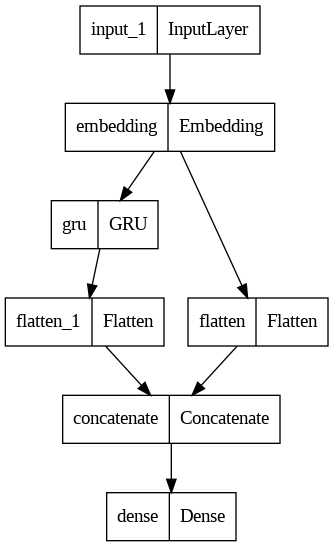

In [199]:
tf.keras.utils.plot_model(model)

In [200]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6374)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 6374, 32)     850336      ['input_1[0][0]']                
                                                                                                  
 gru (GRU)                      (None, 32)           6336        ['embedding[0][0]']              
                                                                                                  
 flatten (Flatten)              (None, 203968)       0           ['embedding[0][0]']              
                                                                                              

Compiling and training the neural network

In [ ]:
model.compile(
 optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy']
)
batch_size = 2
epochs = 3
history = model.fit(
 X_train_rn,
 y_train_rn,
 validation_split=0.2,
 batch_size=batch_size,
 epochs=epochs,
 callbacks=[
 tf.keras.callbacks.EarlyStopping(
 monitor='val_loss',
 patience=3,
 restore_best_weights=True,
 verbose=1
 ),
 tf.keras.callbacks.ReduceLROnPlateau()
 ]
)


Making prediction

In [ ]:
loss, acc = model.evaluate(X_test_rn, y_test_rn, verbose = 0)

In [ ]:
print("Test-Set Loss: {:.2f}%\nTest-Set Accuracy: {:.2f}%".format(loss * 100, acc *100))

The Learning Curve

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(acc)+1)
fig, axes = plt.subplots(1,2, figsize = (12, 8))
axes[0].set_title('Accuracy Curve')
sns.lineplot(x = epochs, y = acc, color ='r', label = 'Training Accuracy', ax = axes[0])
sns.lineplot(x = epochs, y = val_acc, color = 'b', label = 'Validation Accuracy', ax = axes[0])
axes[0].set_xlabel('No. of Epochs', fontsize=14)
axes[0].set_ylabel('Accuracy Score', fontsize=14)
axes[1].set_title('Loss Curve')
sns.lineplot(x = epochs, y =loss, color = 'g', label='Training loss', ax = axes[1])
sns.lineplot(x = epochs, y = val_loss, color = 'y', label ='Validation Loss', ax = axes[1])
axes[1].set_xlabel('No. of Epochs', fontsize=14)
axes[1].set_ylabel('Loss Score', fontsize=14)
plt.suptitle('Model Learning Curve', fontsize = 20)
plt.tight_layout(pad =2)
plt.show()


**References**


https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/


https://www.kaggle.com/code/amar09/sentiment-analysis-on-scrapped-tweets


https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


https://www.kaggle.com/code/ragnisah/text-data-cleaning-tweets-analysis

https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://www.kaggle.com/code/amar09/sentiment-analysis-on-scrapped-tweets

https://www.kaggle.com/datasets/davidwallach/financial-tweets?resource=download